# 📝 Pattern Recognition & Biometrics. Lab session 3.- Classification

By Omar Galarraga & Sonia Garcia

In this lab session, we will focus on a classification task with $N_c = 3$ classes. We would like to predict penguin species based on anatomical measures (adapted from INRIA [n/d]).  

We will be using a part of the [Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/)

Each penguin in the database belongs to one of the three species of the Pygoscelis genre: Adelie, Gentoo and Chinstrap [see figure below].  

![Figure 1. Image of penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

The classification will be based on two features: bill/culmen length and depth [see figure below].

![Figure 2. Image of culmen](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

## Part I. Linear Classification: Naive Bayes Classifier

Let's start by loading the data and doing some data exploration...

In [1]:
import pandas

##If using Google Colab
from google.colab import files
files.upload()
PenguinData = pandas.read_csv("penguins_classification.csv")

#PenguinData = pandas.read_csv("./datasets/penguins_classification.csv")
#PenguinData[:]

Saving penguins_classification.csv to penguins_classification.csv


Let's look at the number of examples by species...

In [2]:
PenguinData["Species"].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

* I.1) Compute the prior probability for each class

In [34]:
#Write your code here
import numpy as np
P_A = 151/(151+123+68)
P_G = 123/(151+123+68)
P_C = 68/(151+123+68)
pri =[P_A,P_G,P_C]
prior = np.array(pri)
#prior

array([0.44152047, 0.35964912, 0.19883041])

Let's look at the histrograms of the input variables...

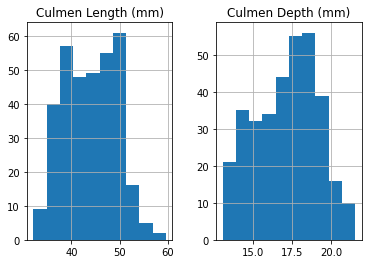

In [4]:
#%matplotlib inline
_ = PenguinData.hist()

Now look at the variable distributions per class.

* I.2) Can we find a linear separator between classes?

  A:  we can not fiind a linear separator to seprate the classes perfectly, but we can find a linear separator try to fit to classifiy 

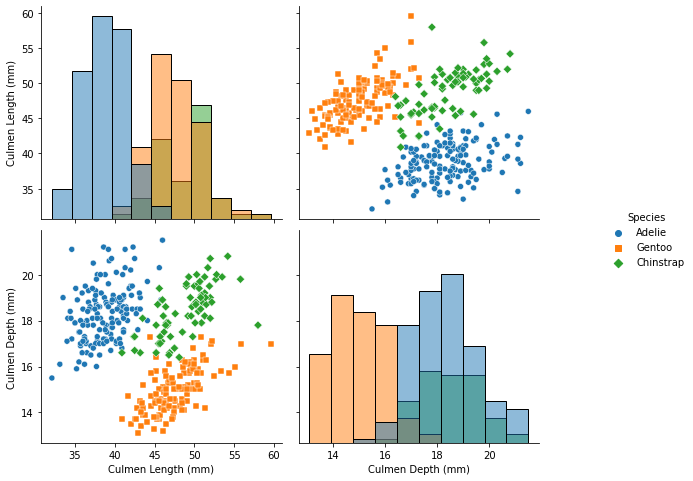

In [5]:
import seaborn as sns
pairplot_figure = sns.pairplot(data = PenguinData, hue = "Species", diag_kind="hist", markers = ["o", "s", "D"])
pairplot_figure.fig.set_size_inches(10, 7)

Redo the previous graph, but this time replace the histrograms by kernel estimations of the density probability function per class. 
* I.3) Can we classify with just one variable? 
      A:  Using just one variable can not classify perfectly, the error rate will high, for example, If the classification is based on culmen length, for adelie penguins can be divided into most, but for gentoo and chinstrap there will be a large error because their features overlap
* I.4) Come up with a decision rule combining both features. (Hint: you can use a decision tree as an inspiration)
      A:We can use the idea of decision tree to classify the features of these penguins, firstly, at around culmen length=36, the penguins are divided into two categories, adelie and gentoo, and then at around culmen depth=14, adelie and gentoo are classified, according to this method can classify part of them, but for the overlapping features it is difficult to classify

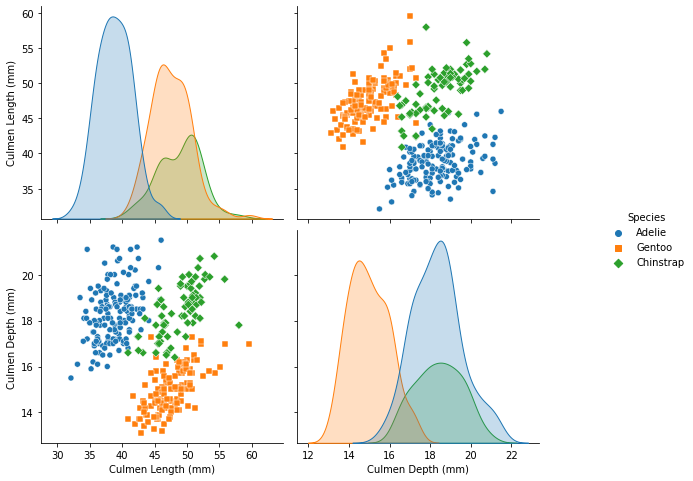

In [6]:
import seaborn as sns
pairplot_figure2 = sns.pairplot(data = PenguinData, hue = "Species", diag_kind="kde", markers = ["o", "s", "D"])
pairplot_figure2.fig.set_size_inches(10, 7)

* I.5) Create a naive Bayes classifier, train it with *data_train* and *target_train* defined below, for predicting the penguin species (Hint: give the label of the class that maximizes the probability $ P(c/x) $)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


X_train, X_test, y_train, y_test = train_test_split(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], PenguinData[["Species"]], test_size=0.3, shuffle=True, random_state=42)
#mean = sum(x)/n * count(x)
#standard deviation = sqrt((sum i to N (x_i – mean(x))^2) / N-1)

#print(PenguinData.shape)
#print(X_train.shape)
#print(y_train.shape)
#Write your code here

In [50]:
x=GaussianNB()
x.fit(X_train,y_train)
pre=x.predict(X_test)
print(pre)

['Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap'
 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie

* I.6) Predict for the examples in *data_test* and compare with the true labels in *target_test*. Compute the classifier's error rate.

In [54]:
from sklearn.metrics import accuracy_score
#print(accuracy_score(pre, y_test))
acc=accuracy_score(pre, y_test)
error = 1-acc
error

0.058252427184465994

In [55]:
print(pre)
print(np.array(y_test))

['Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap'
 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie

* I.7) Compute the minimal error risk of the classifier (you can first find the thresholds analytically). Compare with the error rate computed previously.

In [ ]:
#Write your code here

## Part II. Nonlinear classification with neural networks

We will apply to the same classification problem a neural network based on the multilayer perceptron (MLP), also known as feedforward neural network.

Let's begin with the data preprocessing stage. For all the input variables to equally contribute to the model,  it is crucial to normalize the data. 
In this case, we will center and reduce the inputs (substract the mean and divide by the standard deviation). 

On the other hand, we must convert the labels into quantitative variables to be able to insert them into the neural model. We will use in this case a binary vector encoding like the following:

$$
\begin{array}{ccc}
Adelie & \rightarrow & \left(1\,0\,0\right)^T\\
Gentoo & \rightarrow & \left(0\,1\,0\right)^T\\
Chinstrap & \rightarrow & \left(0\,0\,1\right)^T\\
\end{array}
$$

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

input_preprocessor = StandardScaler()
target_preprocessor = OneHotEncoder(sparse=False)

data = input_preprocessor.fit_transform(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']])
target = target_preprocessor.fit_transform(PenguinData[['Species']])

normdf = pandas.DataFrame(np.concatenate((PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], data), axis=1), columns=['Var1', 'Var2', 'Var1 norm', 'Var2 norm'])
print("Normalized input data")
print(normdf[:10])
print("Target output")
print(pandas.DataFrame(target, columns=['Adelie', 'Gentoo', 'Chinstrap']))

Normalized input data
   Var1  Var2  Var1 norm  Var2 norm
0  39.1  18.7  -0.884499   0.785449
1  39.5  17.4  -0.811126   0.126188
2  40.3  18.0  -0.664380   0.430462
3  36.7  19.3  -1.324737   1.089724
4  39.3  20.6  -0.847812   1.748985
5  38.9  17.8  -0.921185   0.329038
6  39.2  19.6  -0.866155   1.241861
7  34.1  18.1  -1.801661   0.481175
8  42.0  20.2  -0.352544   1.546135
9  37.8  17.1  -1.122961  -0.025949
Target output
     Adelie  Gentoo  Chinstrap
0       1.0     0.0        0.0
1       1.0     0.0        0.0
2       1.0     0.0        0.0
3       1.0     0.0        0.0
4       1.0     0.0        0.0
..      ...     ...        ...
337     0.0     1.0        0.0
338     0.0     1.0        0.0
339     0.0     1.0        0.0
340     0.0     1.0        0.0
341     0.0     1.0        0.0

[342 rows x 3 columns]


Now we create an MLP with $N_{hl} = 1$ hidden layer containing $m=2$ neurons. 

* II.1) What is the size of the *input layer*?
      A： 2
* II.2) What is the size of the *output layer*?
      A: 3


In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
m = 2
mlpmodel = MLPClassifier(hidden_layer_sizes=(m, ), activation="logistic", solver="lbfgs", max_iter=500)
set_config(display='diagram')
mlpmodel

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=500,
              solver='lbfgs')

In order to train the MLP and test its generalization capacity, we need to:

* a) After shuffling the order of observations, separate the data into a train subset (here $70\%$) and a test subset (we'll use $30\%$ here)
* b) Train the model using only the train set 
* c) Then predict for the test set  

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=42)

#Training
mlpmodel.fit(X_train, y_train)


pred_tr = mlpmodel.predict(X_train)
pred_tr_label = target_preprocessor.inverse_transform(pred_tr) #Decoding the binary vectors
train_label = target_preprocessor.inverse_transform(y_train)

#Test
pred_test = mlpmodel.predict(X_test)
#print(pred_test)
pred_test_label = target_preprocessor.inverse_transform(pred_test)
test_label = target_preprocessor.inverse_transform(y_test)
table_test = pandas.DataFrame(np.concatenate((pred_test_label,test_label), axis=1), columns=['Predicted label', 'True label'])
table_test[65:75]

,Predicted label,True label
65,Chinstrap,Adelie
66,Adelie,Adelie
67,Adelie,Adelie
68,Adelie,Adelie
69,Adelie,Adelie
70,Adelie,Adelie
71,Adelie,Adelie
72,Chinstrap,Chinstrap
73,Adelie,Chinstrap
74,Chinstrap,Chinstrap


In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred_tr, y_train))
print(accuracy_score(pred_test, y_test))

0.9665271966527197
0.9805825242718447


* II.3) How many classification errors do you find in the table above?
        We can find 2 classification errors above

Computing the model performance:

In [13]:
#Performance training
acc_tr = (pred_tr_label == train_label).mean()
#Performance test
acc_test = (pred_test_label == test_label).mean()
print(f"The training accuracy is {acc_tr:.4f}")
print(f"The testing accuracy is {acc_test:.4f}")

The training accuracy is 0.9707
The testing accuracy is 0.9806


* II.4) Compute the confusion matrix (for the test set). Which are the best and the worst predicted classes?

  A: From the confusion matrix, we can see the best is Chinstrap(the first class) , for Adelie and Gentoo, they have 1 error respectively.

In [14]:
from sklearn.metrics import confusion_matrix  
print("Confusion Matrix\n",confusion_matrix(pred_test_label,test_label))

Confusion Matrix
 [[49  1  0]
 [ 1 18  0]
 [ 0  0 34]]


We just measured the model performance with a unique test set. We must use cross-validation to properly estimate the generalization of the model.

* II.5) Perform a  K-fold cross-validation with $K=10$ (use *data_shuffle* and *target_shuffle* defined below). Compute the mean and the standard deviation of the accuracy on both train and test sets.

In [15]:
import numpy
from sklearn.model_selection import cross_validate
data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(data, target, train_size=341, shuffle=True, random_state=0)
data_shuffle = numpy.concatenate((data_shuffle1, data_shuffle2), axis=0)
target_shuffle = numpy.concatenate((target_shuffle1, target_shuffle2), axis=0)
mlpmodel_1 = MLPClassifier(hidden_layer_sizes=(m, ), activation="logistic", solver="lbfgs", max_iter=500)
mlpmodel_2 = MLPClassifier(hidden_layer_sizes=(m, ), activation="logistic", solver="lbfgs", max_iter=500)
#Write your code here

In [16]:
def cross_validation(model, _X, _y, _cv=10):
  _scoring = ['accuracy']
  results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
  return {"Accuracy on train sets scores": results['train_accuracy'],
          "Mean of training Accuracy scores": results['train_accuracy'].mean(),
          "Standard deviation of training Accuracy scores": results['train_accuracy'].std()
  }
mlpmodel_1.fit(data_shuffle, target_shuffle) 
result_train = cross_validation(mlpmodel_1,data_shuffle,target_shuffle)
print(result_train)


{'Accuracy on train sets scores': array([0.96742671, 0.96091205, 0.96103896, 0.97727273, 0.96103896,
       0.97077922, 0.97402597, 0.96103896, 0.96753247, 0.97402597]), 'Mean of training Accuracy scores': 0.967509200896823, 'Standard deviation of training Accuracy scores': 0.00600064888908368}


In [17]:
def cross_validation_test(model, _X, _y, _cv=10):
  _scoring = ['accuracy']
  results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
  return {"Accuracy on test sets scores": results['test_accuracy'],
          "Mean of test Accuracy scores": results['test_accuracy'].mean(),
          "Standard deviation of test Accuracy scores": results['test_accuracy'].std()
  }
mlpmodel_2.fit(data_shuffle, target_shuffle) 
result_test = cross_validation_test(mlpmodel_2,data_shuffle,target_shuffle)
print(result_test)


{'Accuracy on test sets scores': array([0.97142857, 1.        , 1.        , 0.91176471, 0.94117647,
       0.97058824, 0.94117647, 0.97058824, 0.97058824, 0.94117647]), 'Mean of test Accuracy scores': 0.9618487394957983, 'Standard deviation of test Accuracy scores': 0.026499783819416606}


In [19]:
def cross_validation_1(model, _X, _y, _cv=10):
  _scoring = ['accuracy']
  results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
  return results['test_accuracy'].mean()

In [28]:
def cross_validation_2(model, _X, _y, _cv=10):
  _scoring = ['accuracy']
  results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
  return results['train_accuracy'].mean()

So far we arbitrarily chose $m=2$ for the number of neurons in the hidden layer. The optimal number of hidden neurons $m_{opt}$ should be found empirically, by varying the value of $m$ and evaluating the performance. 

* II.6) Find $m_{opt}$ in the interval  $\left[2, 10\right]$ by performing 10-fold cross-validation for each value of $m$. What is the model performance with $m=m_{opt}$?

In [20]:
#Write your code here
Average_score = []
for i in range(2,11):
  mlpmodel = MLPClassifier(hidden_layer_sizes=(i, ), activation="logistic", solver="lbfgs", max_iter=500)
  result_1 = cross_validation_1(mlpmodel,data_shuffle,target_shuffle)
  print("when m is ",i,"the mean training acuracy score is",result_1)
  Average_score.append(result_1)

when m is  2 the mean training acuracy score is 0.9471428571428572


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


when m is  3 the mean training acuracy score is 0.9559663865546218


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

when m is  4 the mean training acuracy score is 0.9589915966386554
when m is  5 the mean training acuracy score is 0.9648739495798319
when m is  6 the mean training acuracy score is 0.9500840336134454
when m is  7 the mean training acuracy score is 0.9558823529411764
when m is  8 the mean training acuracy score is 0.9529411764705882
when m is  9 the mean training acuracy score is 0.9559663865546218
when m is  10 the mean training acuracy score is 0.9559663865546218


In [21]:
M_opt=np.argmax(Average_score)+2
print("When m equals to",M_opt,",the performance is the best")


When m equals to 5 ,the performance is the best


Finally, we would like to measure the impact of the train set size on the model performance. 
* II.7) Compute the model performance with respect to the train set size for $n \in \left\{10, 50,  100, 150, 200, 250, 300, 342\right\}$ (use 10-fold cross-validation with $m=m_{opt}$ and for each value of $n$). 
* II.8) Show the learning curve (you could use *matplotlib.pyplot.plot* to show the train and test performances in the same graph). Starting from which value of $n$ the model achieves its maximal potential ($Acc\_test \approx Acc\_train$)?  

In [27]:
#Write your code here
#II.7
n=[10,50,100,150,200,250,300]
result_2=[]
for i in n:
  data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(data, target, train_size=i, shuffle=True, random_state=0)
  mlpmodel = MLPClassifier(hidden_layer_sizes=(M_opt, ), activation="logistic", solver="lbfgs", max_iter=500)
  mlpmodel.fit(data_shuffle1, target_shuffle1)
  result_1 = cross_validation_1(mlpmodel,data_shuffle1,target_shuffle1)
  print("when n is ",i,"the mean training acuracy score is",result_1)
  result_2.append(result_1)

mlpmodel = MLPClassifier(hidden_layer_sizes=(M_opt, ), activation="logistic", solver="lbfgs", max_iter=500)
mlpmodel.fit(data_shuffle, target_shuffle)
result_1 = cross_validation_1(mlpmodel,data_shuffle,target_shuffle)
print("when n is ",342,"the mean training acuracy score is",result_1)
result_2.append(result_1)
#print(result_2)

when n is  10 the mean training acuracy score is 0.9
when n is  50 the mean training acuracy score is 0.9
when n is  100 the mean training acuracy score is 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


when n is  150 the mean training acuracy score is 0.9400000000000001
when n is  200 the mean training acuracy score is 0.945


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


when n is  250 the mean training acuracy score is 0.9359999999999999
when n is  300 the mean training acuracy score is 0.9566666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

when n is  342 the mean training acuracy score is 0.9647058823529411


In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

input_preprocessor = StandardScaler()
target_preprocessor = OneHotEncoder(sparse=False)

data = input_preprocessor.fit_transform(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']])
target = target_preprocessor.fit_transform(PenguinData[['Species']])

normdf = pandas.DataFrame(np.concatenate((PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], data), axis=1), columns=['Var1', 'Var2', 'Var1 norm', 'Var2 norm'])
print("Normalized input data")
print(normdf[:10])
print("Target output")
print(pandas.DataFrame(target, columns=['Adelie', 'Gentoo', 'Chinstrap']))

Normalized input data
   Var1  Var2  Var1 norm  Var2 norm
0  39.1  18.7  -0.884499   0.785449
1  39.5  17.4  -0.811126   0.126188
2  40.3  18.0  -0.664380   0.430462
3  36.7  19.3  -1.324737   1.089724
4  39.3  20.6  -0.847812   1.748985
5  38.9  17.8  -0.921185   0.329038
6  39.2  19.6  -0.866155   1.241861
7  34.1  18.1  -1.801661   0.481175
8  42.0  20.2  -0.352544   1.546135
9  37.8  17.1  -1.122961  -0.025949
Target output
     Adelie  Gentoo  Chinstrap
0       1.0     0.0        0.0
1       1.0     0.0        0.0
2       1.0     0.0        0.0
3       1.0     0.0        0.0
4       1.0     0.0        0.0
..      ...     ...        ...
337     0.0     1.0        0.0
338     0.0     1.0        0.0
339     0.0     1.0        0.0
340     0.0     1.0        0.0
341     0.0     1.0        0.0

[342 rows x 3 columns]


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
mlpmodel = MLPClassifier(hidden_layer_sizes=(M_opt, ), activation="logistic", solver="lbfgs", max_iter=500)
set_config(display='diagram')
mlpmodel

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=500,
              solver='lbfgs')

In [ ]:
from sklearn.metrics import accuracy_score
scores_train=[]
scores_test=[]
for i in range(10,342) :
  X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=i, shuffle=True, random_state=0)
  mlpmodel.fit(X_train, y_train)
  result_1 = cross_validation_1(mlpmodel,X_train,y_train) #test
  scores_test.append(result_1)
  result_2 = cross_validation_2(mlpmodel,X_train,y_train) #train
  scores_train.append(result_2)



  '''
  pred_tr = mlpmodel.predict(X_train)
  pred_test = mlpmodel.predict(X_test)
  scores_train.append(accuracy_score(pred_tr, y_train))
  scores_test.append(accuracy_score(pred_test, y_test))
  '''


#print(scores_train)
#print(scores_test)



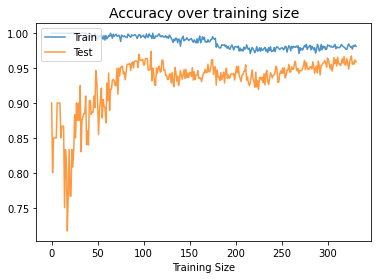

In [31]:
#II.8 plot learning curve
import keras
from matplotlib import pyplot as plt
plt.plot(scores_train, alpha=0.8, label='Train')
plt.plot(scores_test,  alpha=0.8, label='Test')
plt.title("Accuracy over training size", fontsize=14)
plt.xlabel('Training Size')
plt.legend(loc='upper left')
plt.show()

In [32]:
#print(scores_train)
#print(scores_test)
scores_train=np.array(scores_train)
scores_test=np.array(scores_test)
abs=scores_train-scores_test
min=np.argmin(abs)
print("when n = ",min+1,"the model achieves its maximal potential,where Acc_train ≈ Acc_test.")


when n =  327 the model achieves its maximal potential,where Acc_train ≈ Acc_test.
